# Research on taxi rides

As an analyst for __Zuber__, a new ride-sharing company that's launching in Chicago, I made this research to find patterns in the available information.

## Data preperation

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import Image
from IPython.core.display import HTML 

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def load_data(file_name):
    df=''
    try:
        df=pd.read_csv(file_name)
    except:
        df=pd.read_csv('/datasets/{}'.format(file_name))
    return df

df_sql1=load_data('project_sql_result_01.csv')
df_sql4=load_data('project_sql_result_04.csv')
df_sql7=load_data('project_sql_result_07.csv')

In [3]:
df_sql1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_sql4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df_sql7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


I'll convert the data type of start_ts to date

In [6]:
df_sql7['start_ts']=pd.to_datetime(df_sql7['start_ts'], format='%Y-%m-%d %H:%M:%S')

### Data conversion

Just prettifying the columns.

In [7]:
df_sql4['average_trips']=df_sql4['average_trips'].astype('int')
df_sql4.head(2)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523


In [8]:
df_sql7['duration_seconds']=df_sql7['duration_seconds'].astype('int')
df_sql7.head(2)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920


### Rename DataFrames

For easier understanding of the content of each dataframe, I'm renaming them accordingly.

In [9]:
df_trips_comp=df_sql1
df_drops=df_sql4
df_duration_weather=df_sql7

## Analysis

### identify the top 10 neighborhoods in terms of drop-offs

In [10]:
df_drops_top_10=df_drops.sort_values('average_trips', ascending=False).head(10)
df_drops_top_10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


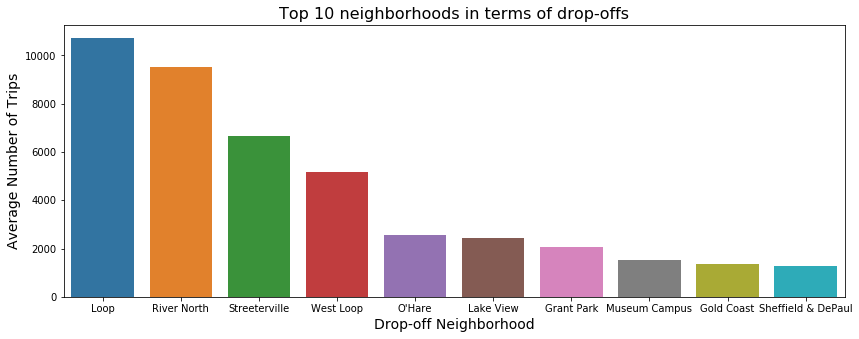

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)

sns.barplot(x='dropoff_location_name', y="average_trips", data=df_drops_top_10)

ax.set_xlabel("Drop-off Neighborhood", fontsize=14)
ax.set_ylabel("Average Number of Trips", fontsize=14)
ax.axes.set_title("Top 10 neighborhoods in terms of drop-offs", fontsize=16);

plt.show();

Looking at the results, and the graph, there is something surprising. The __O'Hare International Airport__ is not leading in the number of drop-offs. This means that more people are coming to this area through the airport, rather than take off using it.

### Taxi companies and number of rides

In [12]:
df_trips_comp.head(2)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422


In [13]:
df_trips_comp.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [14]:
df_trips_comp_top_20=df_trips_comp.sort_values('trips_amount', ascending=False).head(20)
df_trips_comp_top_20

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


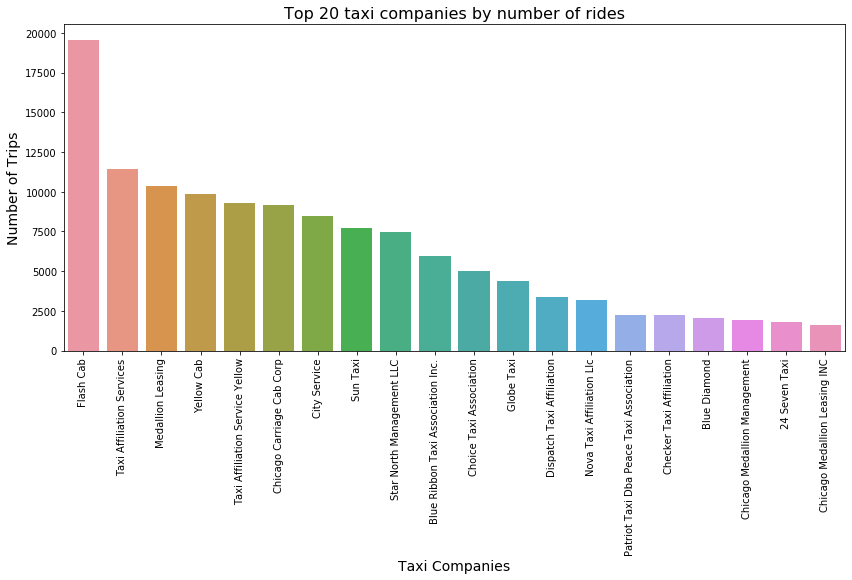

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)

sns.barplot(x='company_name', y="trips_amount", data=df_trips_comp_top_20)

ax.set_xlabel("Taxi Companies", fontsize=14)
ax.set_ylabel("Number of Trips", fontsize=14)
ax.axes.set_title("Top 20 taxi companies by number of rides", fontsize=16);
plt.xticks(rotation=90)

plt.show();

Looking at the results, and the graph, there is one taxi company that stands out in the number of rides comparing to other taxi companies. That is the __Flash Cab__ company. From the __describe__ function we can see that the 75% is 2106, meaning that the first 16 taxi companies are responsible for 75% of all taxi rides (from a total of 64 companies).

## Testing hypotheses

The null hypothsis:  
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.  
So the alternative hypothsis is:  
The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

The df_duration_weather dataframe contains data on rides from the Loop to O'Hare International Airport, and the weather condition during the ride.

In [16]:
df_duration_weather.head(2)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920


Since the hypothesis regards Saturday, I'm adding a column with the day of the week.

In [17]:
df_duration_weather['day_of_week']=df_duration_weather['start_ts'].dt.day_name()
len(df_duration_weather.query('day_of_week!="Saturday"'))
df_duration_weather.head()

0

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,Saturday
1,2017-11-25 14:00:00,Good,1920,Saturday
2,2017-11-25 12:00:00,Good,1543,Saturday
3,2017-11-04 10:00:00,Good,2512,Saturday
4,2017-11-11 07:00:00,Good,1440,Saturday


The data in the dataframe is only on rides that occured on Saturdays.

Making 2 new dataframes one for rides on good weather, and the other one of bad weather.

In [18]:
df_duration_weather_good=df_duration_weather.query('weather_conditions=="Good"')
df_duration_weather_bad=df_duration_weather.query('weather_conditions=="Bad"')


In [19]:
df_duration_weather_good.head(2)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,Saturday
1,2017-11-25 14:00:00,Good,1920,Saturday


In [20]:
df_duration_weather_bad.head(2)

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969,Saturday
30,2017-11-18 12:00:00,Bad,1980,Saturday


As a threshold (alpha) I'll choose 5% as it is the commonly used value for the rejected values.

In [21]:
results = st.ttest_ind(df_duration_weather_good['duration_seconds'],df_duration_weather_bad['duration_seconds'])

alpha = 0.05  # critical statistical significance level

if results.pvalue > alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

We can't reject the null hypothesis


There is a difference between the 2 populations (rides on Saturdays with good weather, and ones with bad weather), therefore I can't reject the null hypothesis.

## Conclusion

I managed to find several patterns relying on the provided data. Each section and task has its own conclusion, identifying a certain pattern. There was one odd pattern, which I think needs to be rechecked, although there is an international airport, there are more drop-offs in several neighborhoods rather than on the airport itself.